# **LGBM & XGBM**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading datasets
#train data and test data
train1=pd.read_csv('Titanic_train.csv')
test1=pd.read_csv('Titanic_test.csv')

## EDA

In [3]:
# Viewing training data and different features
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train1.shape

(891, 12)

In [5]:
train1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# printing all the values and counts for each variable

import pandas as pd

df = pd.read_csv('Titanic_train.csv')

for column in df.columns:
  print(f"Values and counts for column '{column}':")
  print(df[column].value_counts())
  print("\n")

Values and counts for column 'PassengerId':
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Values and counts for column 'Survived':
Survived
0    549
1    342
Name: count, dtype: int64


Values and counts for column 'Pclass':
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Values and counts for column 'Name':
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Values and counts 

**Based on analysis**

Continuos variables are**:** **Age, Fare**

Discrete variables are**:** **PassengerId, Survived, Pclass, SibSp, Parch**

Catrgorical variables are**:** **Name, Sex, Ticket, Cabin, Embarked**

In [8]:
# Statistical analysis
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Finding null values
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values are present in **Age, Cabin, Embarked.**

In [10]:
# Check for duplicates
if(train1.duplicated().sum() != 0):
    print("DUPLICATES ARE PRESENT")
    print("No.of duplicated rows: ",train1.duplicated().sum())
else:
    print("NO DUPLICATES")

# Print duplicated values
train1[train1.duplicated(keep = False)]

NO DUPLICATES


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Data Visualization

In [11]:
train_cont=train1.drop(train1.columns[[0,1,2,3,4,6,7,8,10,11]],axis=1)
train_cont

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


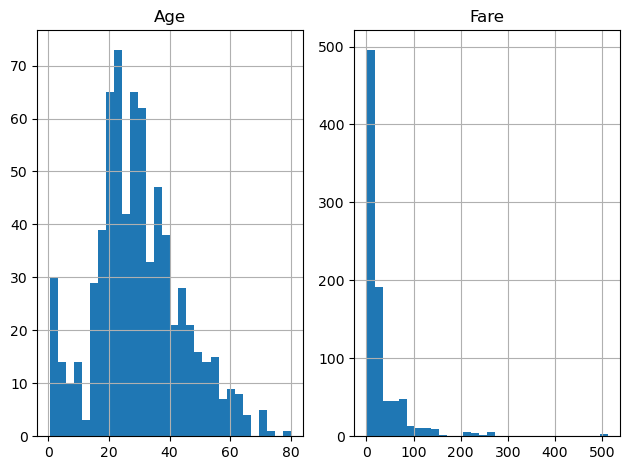

In [12]:
# histograms of continuos variables

import matplotlib.pyplot as plt
train_cont.hist(bins=30, layout=(1, len(train_cont.columns)))
plt.tight_layout()
plt.show()

In [13]:
train_dis=train1.drop(train1.columns[[3,4,5,8,9,10,11]],axis=1)
train_dis

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


<Figure size 640x480 with 0 Axes>

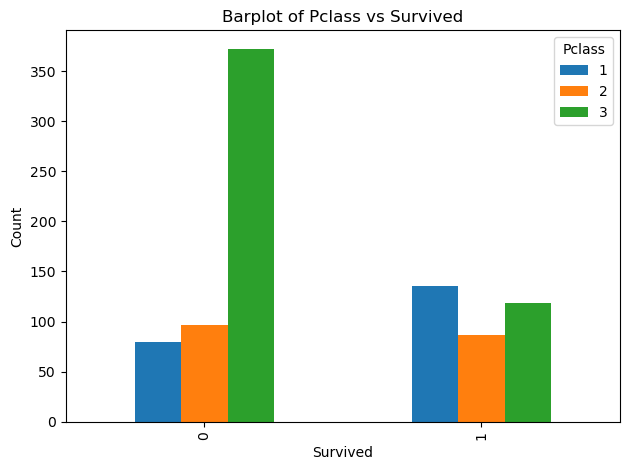

<Figure size 640x480 with 0 Axes>

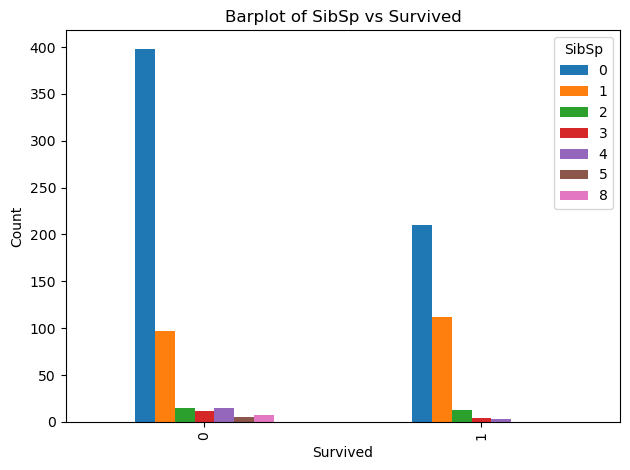

<Figure size 640x480 with 0 Axes>

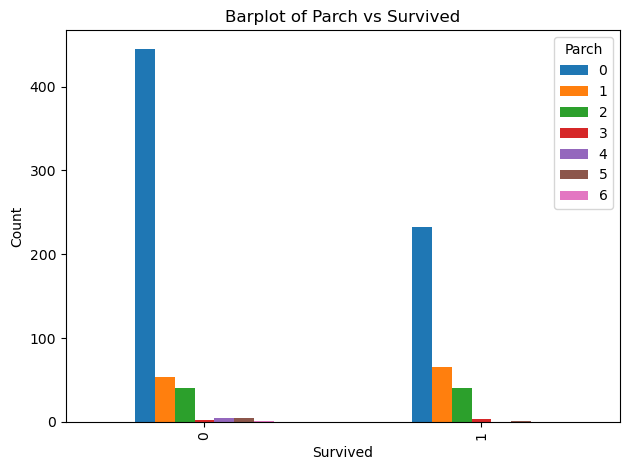

In [14]:
#  barplots of variables against survived variable

import matplotlib.pyplot as plt

# Iterate through columns except 'Survived' and 'PassengerId'
for column in train_dis.columns:
    if column not in ['Survived', 'PassengerId']:
        plt.figure()  # Create a new figure for each plot
        train_dis.groupby(['Survived'])[column].value_counts().unstack().plot(kind='bar')
        plt.title(f'Barplot of {column} vs Survived')
        plt.xlabel('Survived')
        plt.ylabel('Count')
        plt.tight_layout()

plt.show()

In [15]:
train_cat=train1.drop(train1.columns[[0,2,5,6,7,9]],axis=1)
train_cat

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",male,211536,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,1,"Behr, Mr. Karl Howell",male,111369,C148,C


<Figure size 640x480 with 0 Axes>

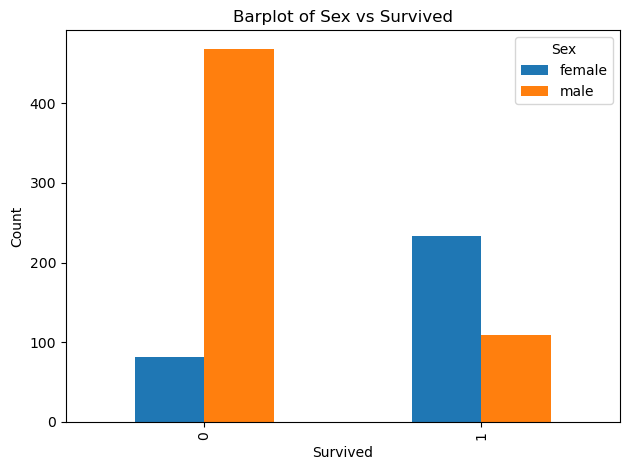

<Figure size 640x480 with 0 Axes>

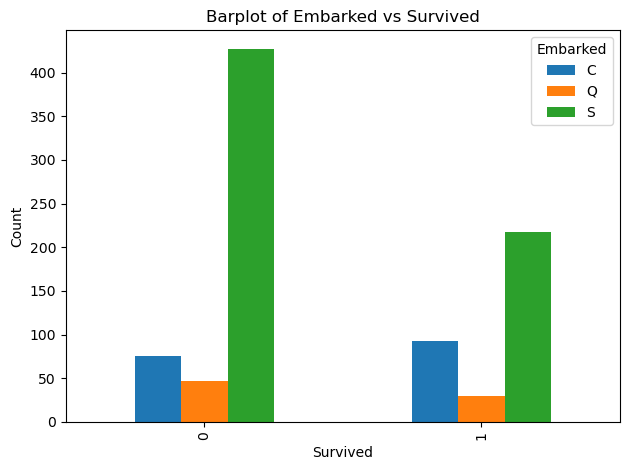

In [16]:
# bargraphs for Sex and Embarked variables against Survived

# Iterate through columns 'Sex' and 'Embarked'
for column in ['Sex', 'Embarked']:
    plt.figure()  # Create a new figure for each plot
    train_cat.groupby(['Survived'])[column].value_counts().unstack().plot(kind='bar')
    plt.title(f'Barplot of {column} vs Survived')
    plt.xlabel('Survived')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

In [17]:
# Dropping Cabin due to large number of null values
train1.drop('Cabin', axis=1, inplace=True)

In [18]:
# fill the null values in Age with its mean

# Calculate the mean of the 'Age' column, ignoring NaN values
mean_age = train1['Age'].mean()

# Fill NaN values in the 'Age' column with the calculated mean
train1['Age'].fillna(mean_age, inplace=True)

# Verify that there are no more NaN values in the 'Age' column
print(train1['Age'].isnull().sum())

0


In [19]:
# Remove rows with null values in the 'Embarked' column
train1.dropna(subset=['Embarked'], inplace=True)

# Verify that there are no more NaN values in the 'Embarked' column
print(train1['Embarked'].isnull().sum())

0


In [20]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
noutlier=train1.drop(train1.columns[[0,1,2,3,4,5,8,9,10]],axis=1)
noutlier

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


In [22]:
outlier=train1.drop(train1.columns[[6,7]],axis=1)
outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C


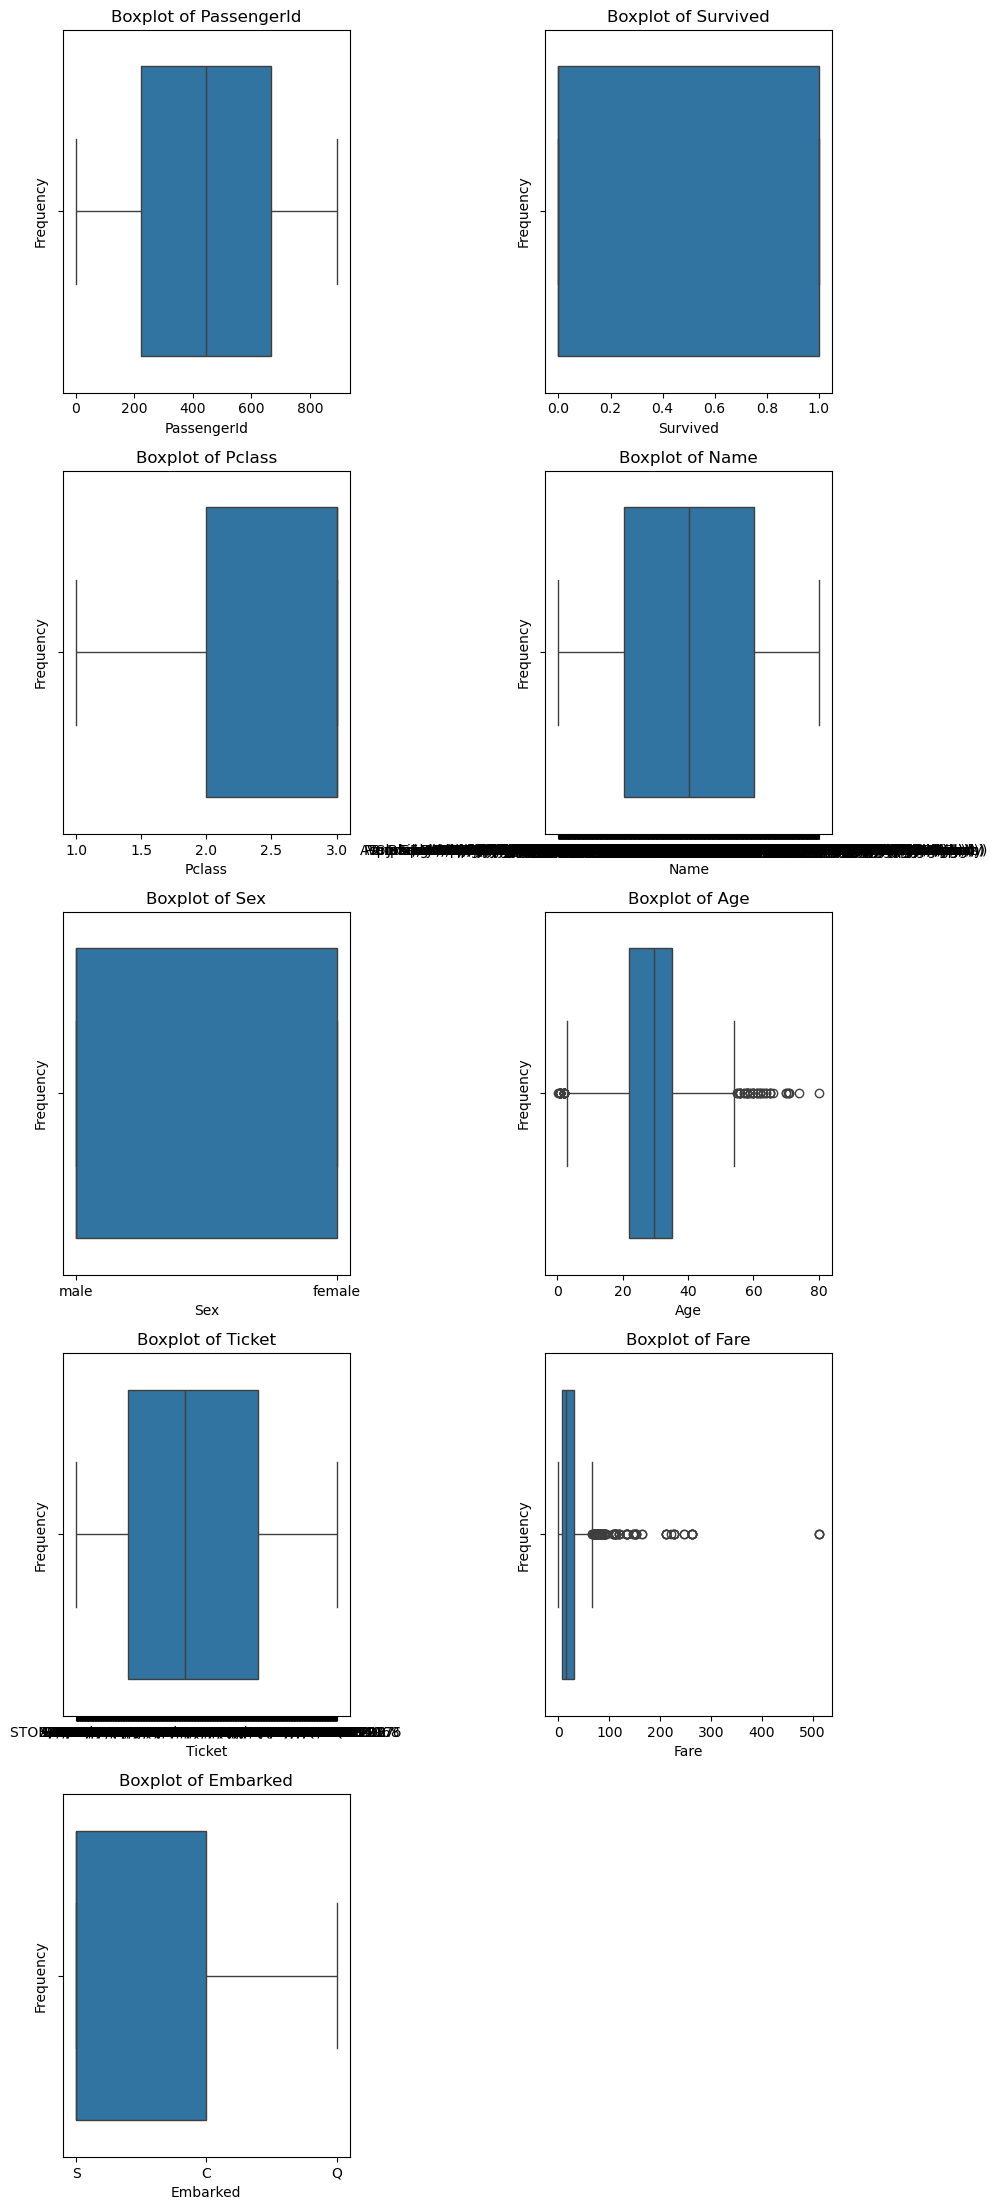

In [23]:
# BOXPLOT TO CHECK OUTLIERS
plt.figure(figsize = (10,35))
for i, column in enumerate( outlier,1):
    plt.subplot(8,2,i)
    sns.boxplot(x = outlier[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Outliers are present in **Age and Fare.**

In [24]:
# Capping outliers
import pandas as pd
import numpy as np

# function to detect and cap outliers using IQR method
def cap_outliers_iqr(outlier, column):
    Q1 = outlier[column].quantile(0.25)
    Q3 = outlier[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier[column] = np.where(outlier[column] < lower_bound, lower_bound, outlier[column])
    outlier[column] = np.where(outlier[column] > upper_bound, upper_bound, outlier[column])
    return outlier

# Iterate through numerical columns and cap outliers
for column in outlier.select_dtypes(include=np.number).columns:
    outlier = cap_outliers_iqr(outlier, column)

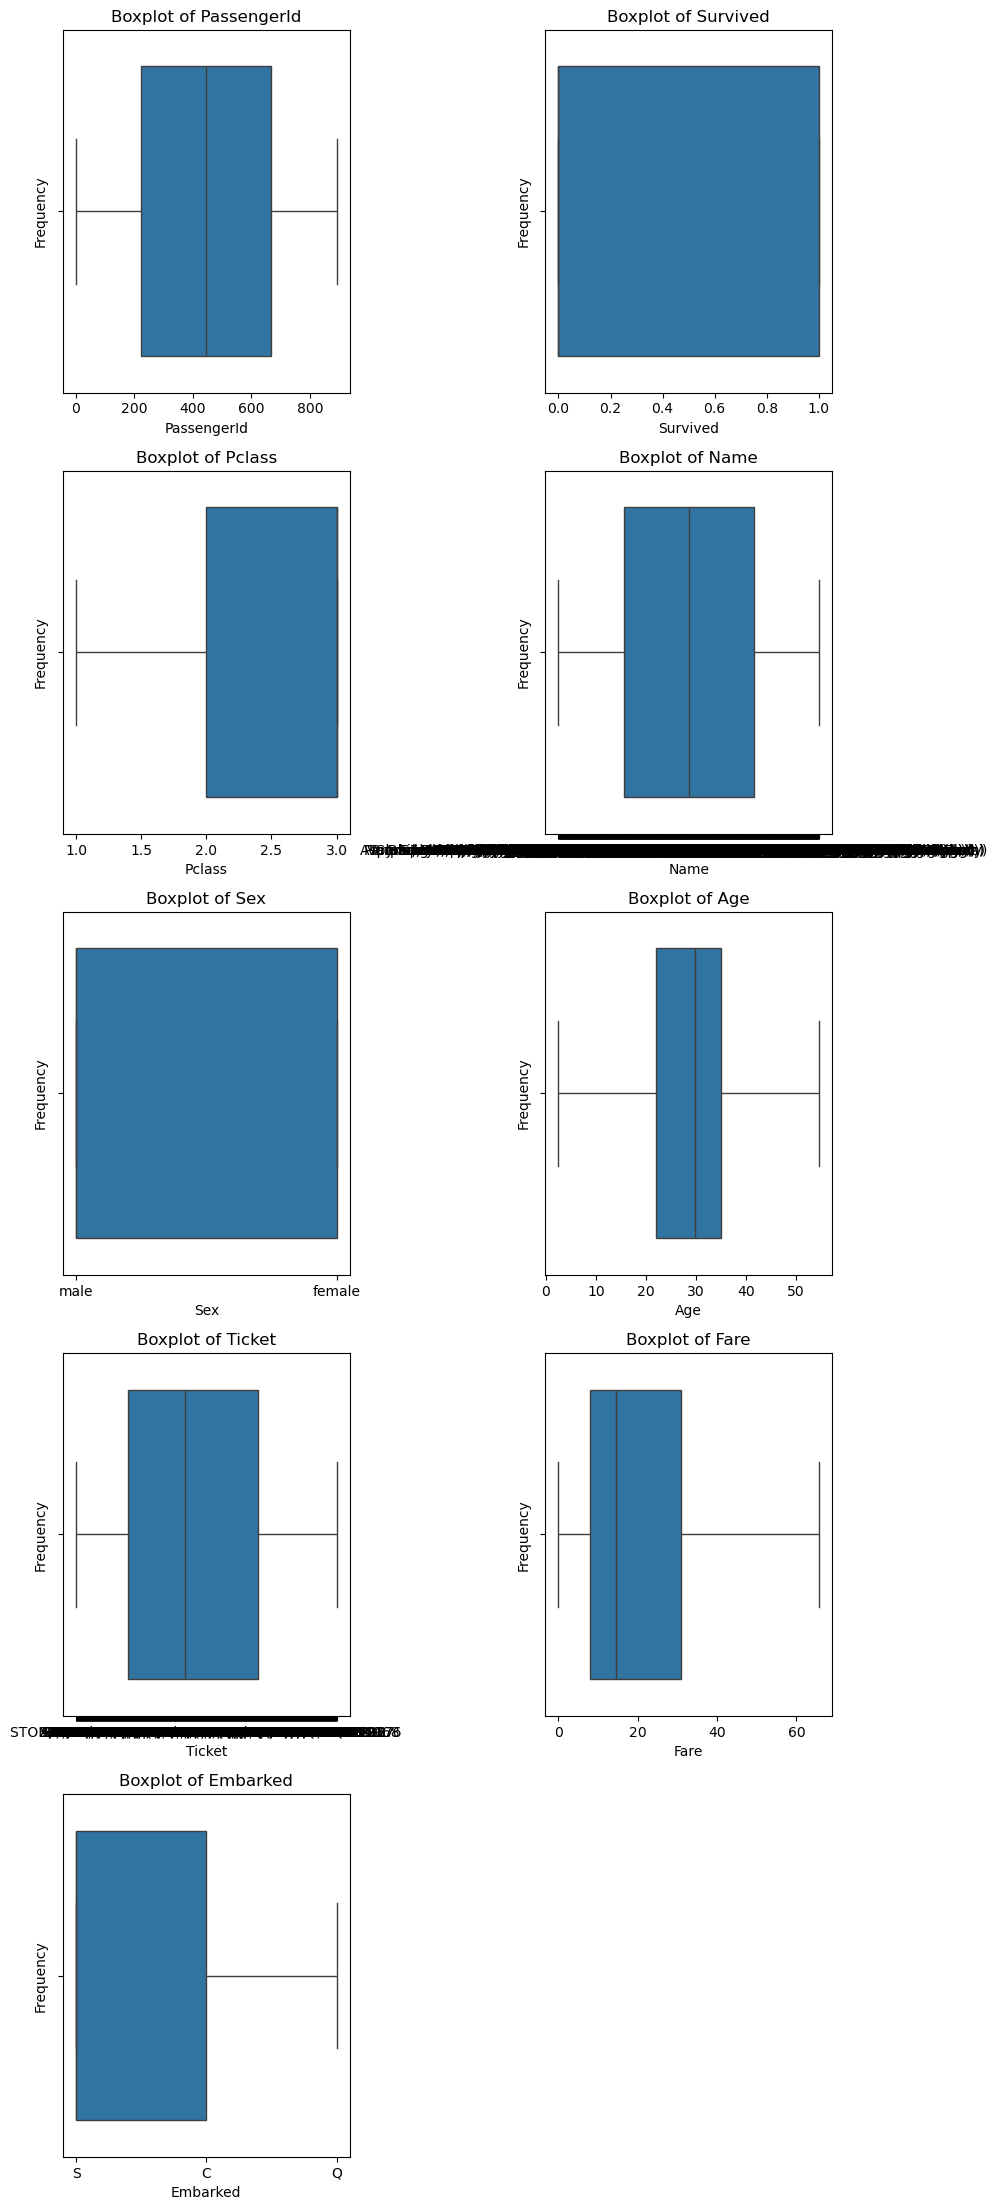

In [25]:
# BOXPLOT to check outliers
plt.figure(figsize = (10,35))
for i, column in enumerate( outlier,1):
    plt.subplot(8,2,i)
    sns.boxplot(x = outlier[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

No outliers are present

In [26]:
outlier.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,65.6563,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S


In [27]:
train=pd.concat([outlier,noutlier,],axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,SibSp,Parch
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1,0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,65.6563,C,1,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0,0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1,0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,0,0
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,0,0
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,1,2
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,0,0


In [28]:
# drop PassengerId ,Name and Ticket variables from train dataset
train = train.drop(['PassengerId','Name','Ticket'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,0.0,3.0,male,22.0,7.2500,S,1,0
1,1.0,1.0,female,38.0,65.6563,C,1,0
2,1.0,3.0,female,26.0,7.9250,S,0,0
3,1.0,1.0,female,35.0,53.1000,S,1,0
4,0.0,3.0,male,35.0,8.0500,S,0,0


## Data Preprocesing

In [29]:
# label encode Sex and Embarked variables

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the columns 'Sex' and 'Embarked'
for column in ['Sex', 'Embarked']:
    # Fit and transform the column using LabelEncoder
    train[column] = le.fit_transform(train[column])
# Print the updated DataFrame
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,0.0,3.0,1,22.0,7.2500,2,1,0
1,1.0,1.0,0,38.0,65.6563,0,1,0
2,1.0,3.0,0,26.0,7.9250,2,0,0
3,1.0,1.0,0,35.0,53.1000,2,1,0
4,0.0,3.0,1,35.0,8.0500,2,0,0


In [30]:
# display the counts of variables Pclass,Parch,SibSp,Embarked variables

# Display the counts for Pclass, Parch, and Embarked variables
print("Counts for Pclass:")
print(train['Pclass'].value_counts())
print("\n")

print("Counts for Parch:")
print(train['Parch'].value_counts())
print("\n")

print("Counts for SibSp:")
print(train['SibSp'].value_counts())
print("\n")

print("Counts for Embarked:")
print(train['Embarked'].value_counts())

Counts for Pclass:
Pclass
3.0    491
1.0    214
2.0    184
Name: count, dtype: int64


Counts for Parch:
Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


Counts for SibSp:
SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


Counts for Embarked:
Embarked
2    644
0    168
1     77
Name: count, dtype: int64


In [31]:
train.shape

(889, 8)

In [32]:
# standardize Age and Fare variables

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the 'Age', 'Fare' columns
train[['Age', 'Fare',]] = scaler.fit_transform(train[['Age', 'Fare']])

# Print the updated DataFrame
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,0.0,3.0,1,-0.609751,-0.818784,2,1,0
1,1.0,1.0,0,0.719613,2.043778,0,1,0
2,1.0,3.0,0,-0.277410,-0.785701,2,0,0
3,1.0,1.0,0,0.470357,1.428379,2,1,0
4,0.0,3.0,1,0.470357,-0.779575,2,0,0


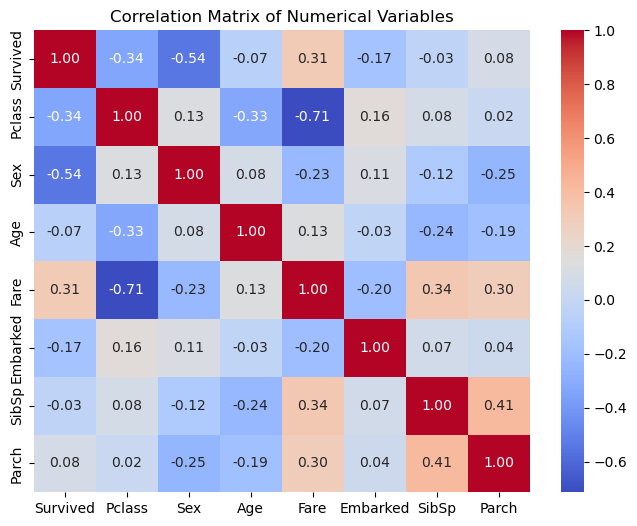

In [33]:
# plot the correlation matrix between all the numerical variables

# Create the correlation matrix
correlation_matrix = train.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Data Transformation and Model Fitting

In [34]:
# Defining X and Y
Y = train["Survived"]
X = train.drop(train[['Survived']],axis=1)
X.head()

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3.0,1,-0.609751,-0.818784,2,1,0
1,1.0,0,0.719613,2.043778,0,1,0
2,3.0,0,-0.277410,-0.785701,2,0,0
3,1.0,0,0.470357,1.428379,2,1,0
4,3.0,1,0.470357,-0.779575,2,0,0


In [35]:
Y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [36]:
# data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2)

df.shape
X_train.shape
print(X_test.shape)
Y_train
print(Y_test.shape)

(178, 7)
(178,)


In [37]:
# GRADIENTBOOSTING CLASSIFIER
#------------------------------------------------------------------

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# cross validation
training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    gbmodel = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_features=0.9,max_depth=9)
    gbmodel.fit(X_train,Y_train)
    Y_pred_train = gbmodel.predict(X_train)
    Y_pred_test = gbmodel.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("GBC-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("GBC-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

GBC-CV-training accuracy:  0.98
GBC-CV-test accuracy:  0.8
variance 0.18


In [38]:
# classification report (GRADIENTBOOSTING)

from sklearn.metrics import classification_report
print('classification report (GRADIENTBOOSTING)')
print(classification_report(Y_test, Y_pred_test))

classification report (GRADIENTBOOSTING)
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       114
         1.0       0.76      0.69      0.72        64

    accuracy                           0.81       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.81      0.81      0.81       178



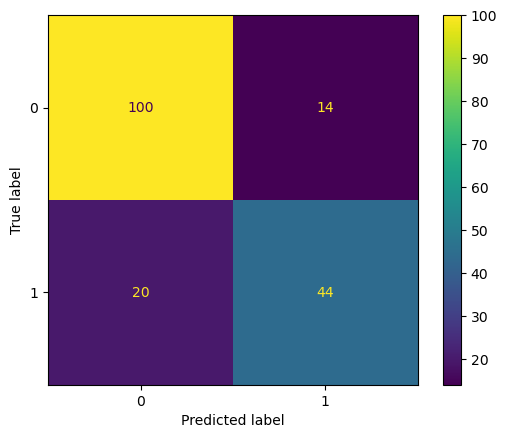

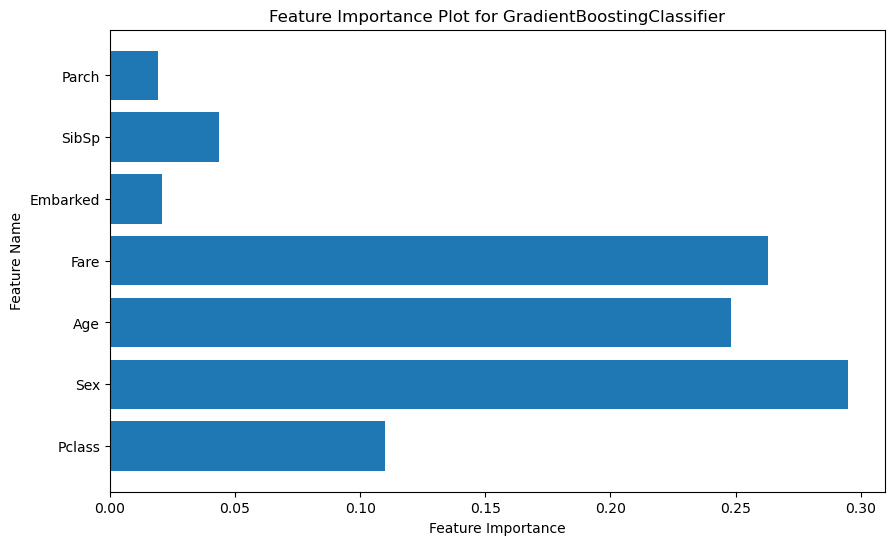

In [39]:
# Visualize results of GRADIENTBOOSTING model

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Feature Importance
feature_importance = gbmodel.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot for GradientBoostingClassifier")
plt.show()

In [40]:
# ADABOOSTING CLASSIFIER
#------------------------------------------------------------------

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

# cross validation

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    adamodel = AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
    adamodel.fit(X_train,Y_train)
    Y_pred_train = adamodel.predict(X_train)
    Y_pred_test = adamodel.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("ABC-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("ABC-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

ABC-CV-training accuracy:  0.81
ABC-CV-test accuracy:  0.8
variance 0.01


In [41]:
# classification report (ADABOOSTING CLASSIFIER)

from sklearn.metrics import classification_report
print('classification report (ADABOOSTING CLASSIFIER)')
print(classification_report(Y_test, Y_pred_test))

classification report (ADABOOSTING CLASSIFIER)
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       114
         1.0       0.73      0.73      0.73        64

    accuracy                           0.81       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



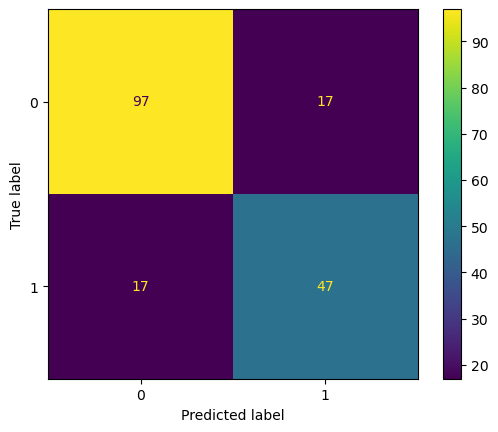

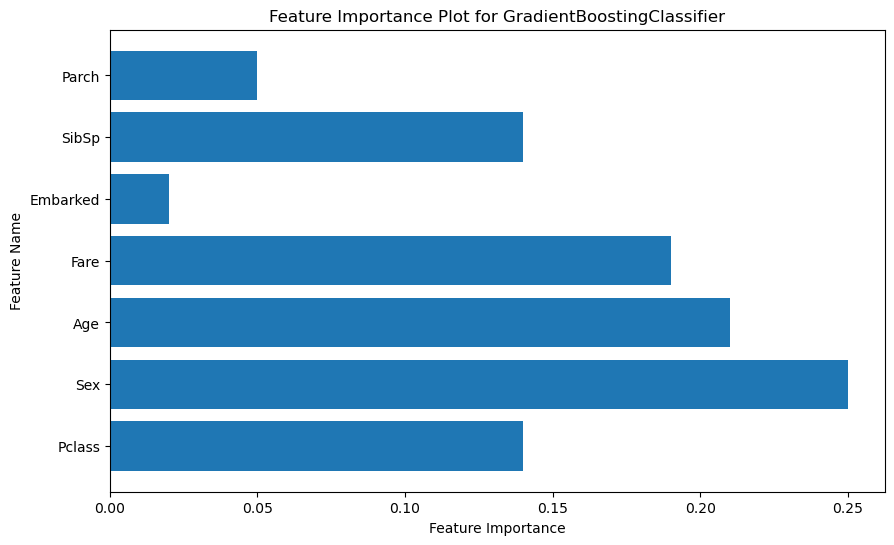

In [42]:
# Visualize the results of GRADIENTBOOSTING model

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Feature Importance
feature_importance = adamodel.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot for GradientBoostingClassifier")
plt.show()

In [43]:
# XGBOOST- CLASSIFIER
#------------------------------------------------------------------

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

# cross validation
for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    xgmodel = XGBClassifier(n_estimators=100,learning_rate=0.1,reg_lambda=50,gamma=25)
    xgmodel.fit(X_train,Y_train)
    Y_pred_train = xgmodel.predict(X_train)
    Y_pred_test = xgmodel.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("XGB-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("XGB-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

XGB-CV-training accuracy:  0.79
XGB-CV-test accuracy:  0.79
variance -0.0


In [44]:
# classification report (XGBOOST CLASSIFIER)

from sklearn.metrics import classification_report
print('classification report (XGBOOST CLASSIFIER)')
print(classification_report(Y_test, Y_pred_test))

classification report (XGBOOST CLASSIFIER)
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       114
         1.0       0.74      0.70      0.72        64

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



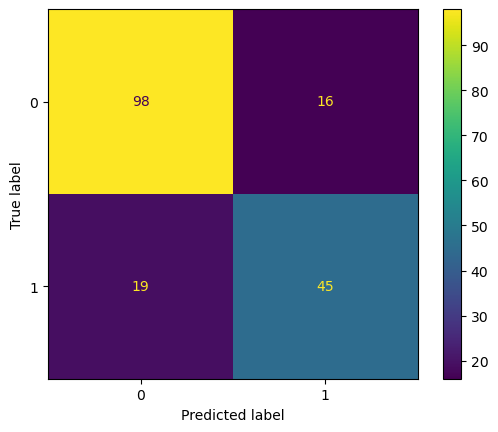

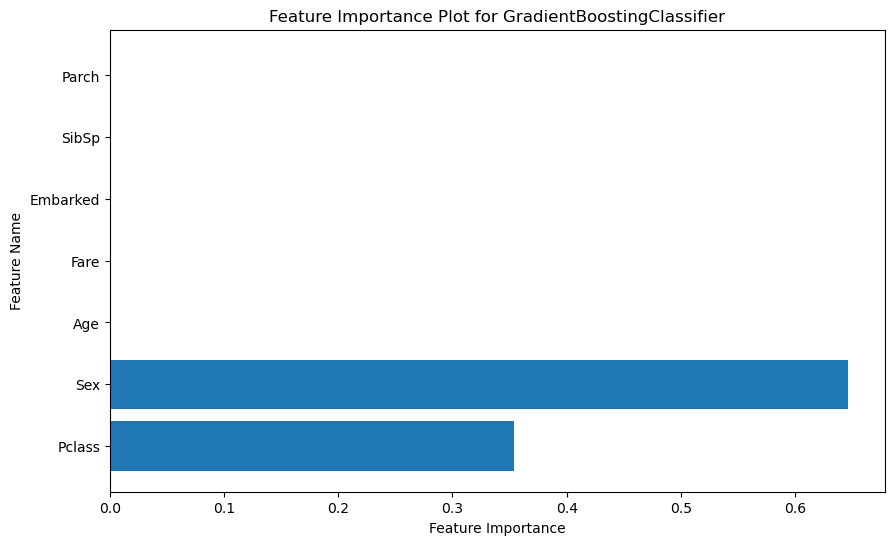

In [45]:
# Visualize the results of GRADIENTBOOSTING model

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Feature Importance
feature_importance = xgmodel.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot for GradientBoostingClassifier")
plt.show()

# **Processing test data**

In [46]:
#Reading Test data
import pandas as pd
test1=pd.read_csv('Titanic_test.csv')
test1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [47]:
#Cleaning the data by removing irrelevant columns
test1=test1.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)
test1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [48]:
# label encode Sex and Embarked variables

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the columns 'Sex' and 'Embarked'
for column in ['Sex', 'Embarked']:
  # Fit and transform the column using LabelEncoder
  test1[column] = le.fit_transform(test1[column])

# Print the updated DataFrame
test1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [49]:
#check for the null values
test1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [50]:
# fill the null values in Age with its mean

# Calculate the mean of the 'Age' column, ignoring NaN values
mean_age = test1['Age'].mean()

# Fill NaN values in the 'Age' column with the calculated mean
test1['Age'].fillna(mean_age, inplace=True)

# Verify that there are no more NaN values in the 'Age' column
print(test1['Age'].isnull().sum())

0


In [51]:
#fill the null values in Fare with its mean
test1['Fare']=test1['Fare'].fillna(test1['Fare'].mean())

In [52]:
test1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [53]:
test1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [54]:
outlier1=test1.drop(test1.columns[[3,4]],axis=1)
outlier1

,Pclass,Sex,Age,Fare,Embarked
0,3,1,34.50000,7.8292,1
1,3,0,47.00000,7.0000,2
2,2,1,62.00000,9.6875,1
3,3,1,27.00000,8.6625,2
4,3,0,22.00000,12.2875,2
...,...,...,...,...,...
413,3,1,30.27259,8.0500,2
414,1,0,39.00000,108.9000,0
415,3,1,38.50000,7.2500,2
416,3,1,30.27259,8.0500,2


In [55]:
noutlier1=test1.drop(test1.columns[[0,1,2,5,6]],axis=1)
noutlier1

,SibSp,Parch
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,0,0
415,0,0
416,0,0


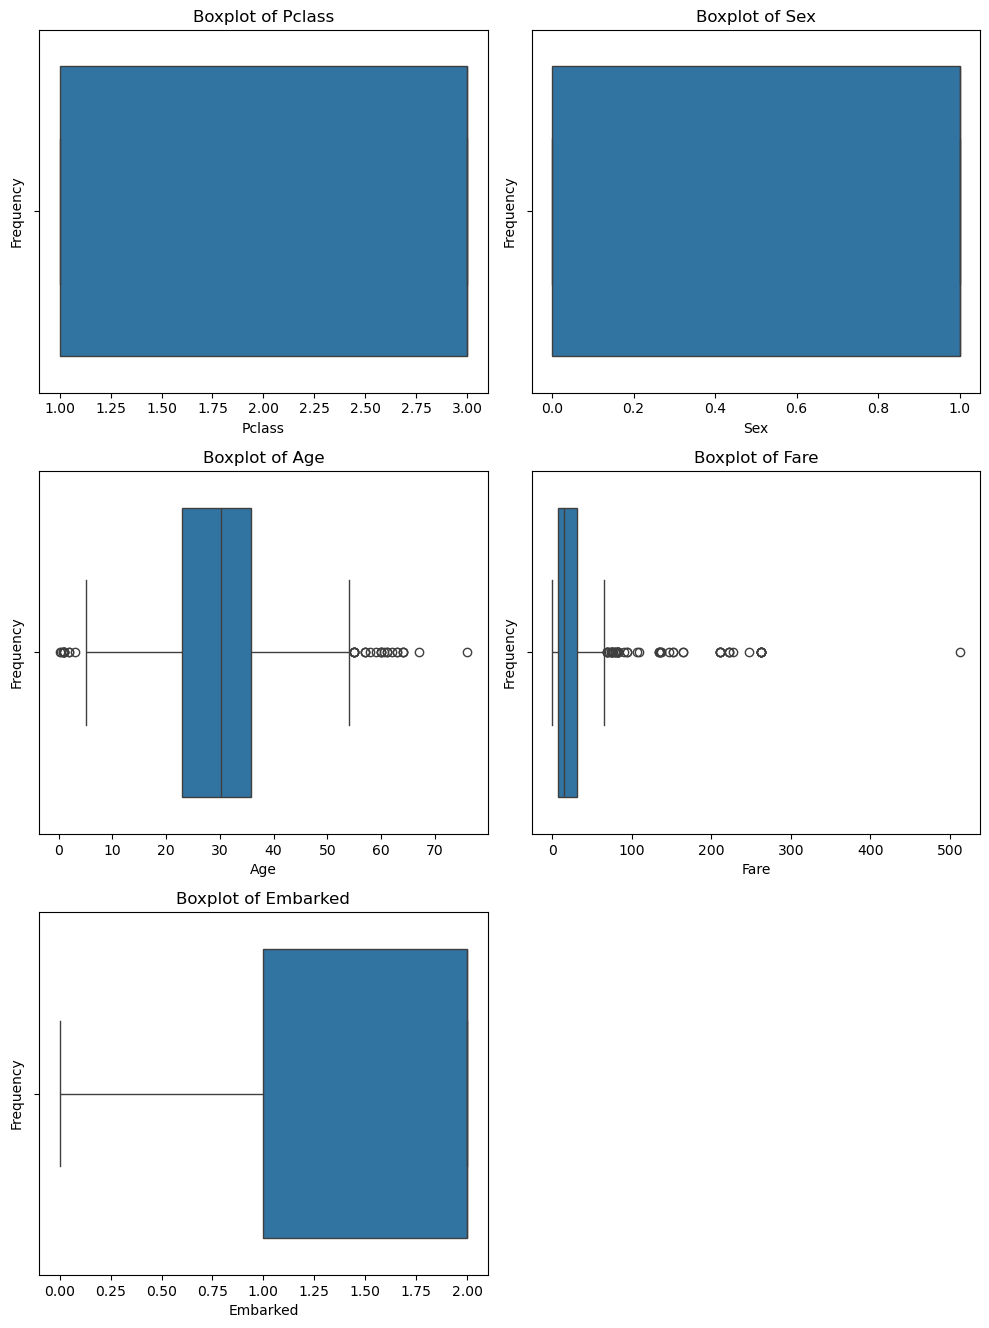

In [56]:
# BOXPLOT
plt.figure(figsize = (10,35))
for i, column in enumerate( outlier1,1):
    plt.subplot(8,2,i)
    sns.boxplot(x = outlier1[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Outliers are present in **Age and Fare.**

In [57]:
# Capping outliers

import pandas as pd
import numpy as np

# function to detect and cap outliers using IQR method
def cap_outliers_iqr(outlier1, column):
    Q1 = outlier1[column].quantile(0.25)
    Q3 = outlier1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier1[column] = np.where(outlier1[column] < lower_bound, lower_bound, outlier1[column])
    outlier1[column] = np.where(outlier1[column] > upper_bound, upper_bound, outlier1[column])
    return outlier1

# Iterate through numerical columns and cap outliers
for column in outlier1.select_dtypes(include=np.number).columns:
    outlier1 = cap_outliers_iqr(outlier1, column)

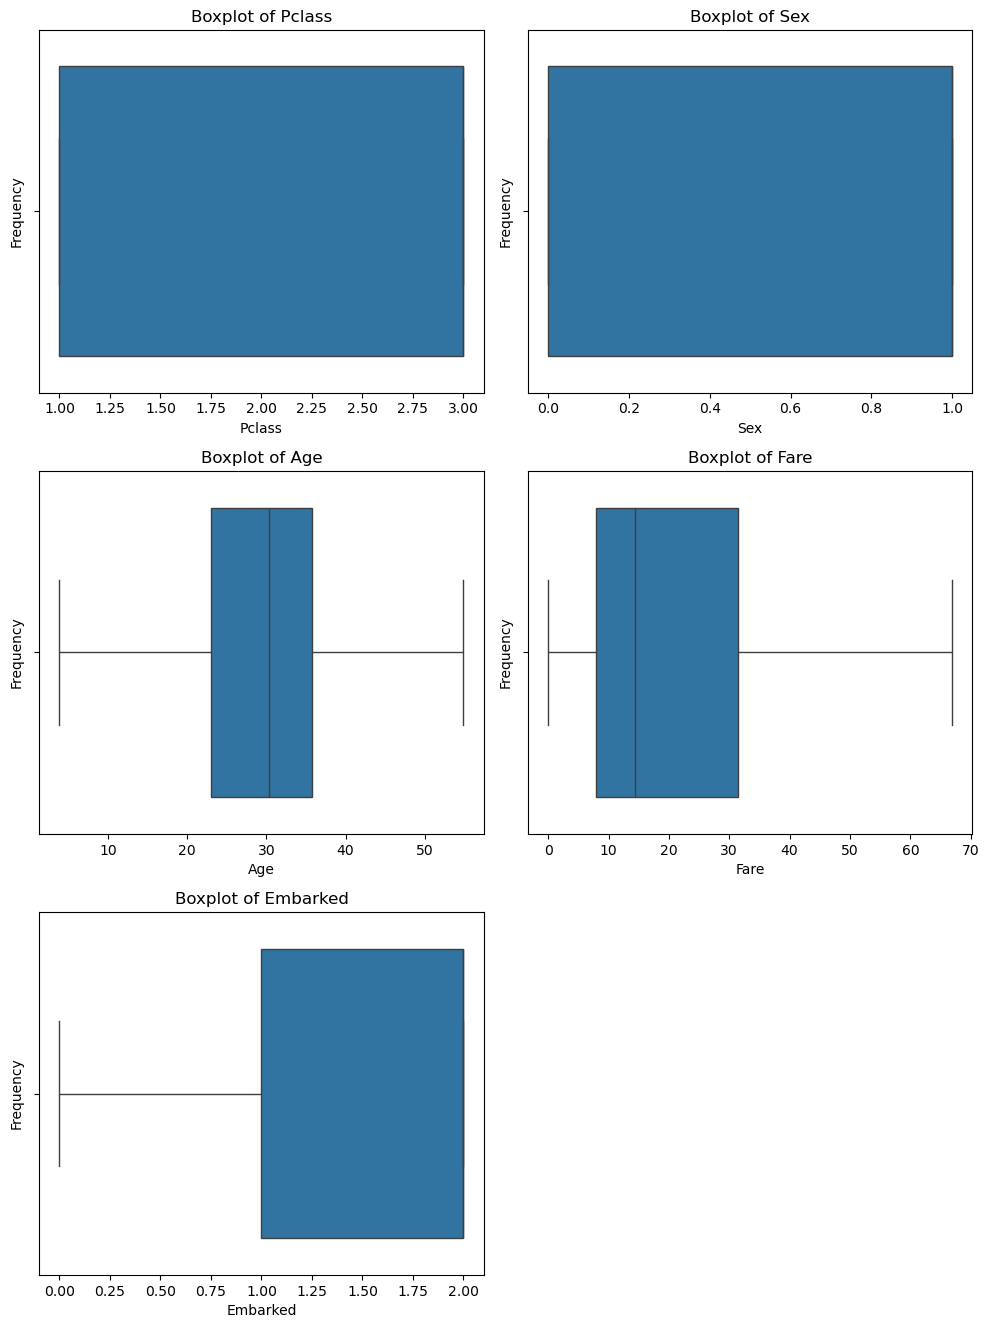

In [58]:
# BOXPLOT to check outliers
plt.figure(figsize = (10,35))
for i, column in enumerate( outlier1,1):
    plt.subplot(8,2,i)
    sns.boxplot(x = outlier1[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

No outliers are present

In [59]:
test=pd.concat([outlier1,noutlier1],axis=1)
test

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3.0,1.0,34.50000,7.8292,1.0,0,0
1,3.0,0.0,47.00000,7.0000,2.0,1,0
2,2.0,1.0,54.87500,9.6875,1.0,0,0
3,3.0,1.0,27.00000,8.6625,2.0,0,0
4,3.0,0.0,22.00000,12.2875,2.0,1,1
...,...,...,...,...,...,...,...
413,3.0,1.0,30.27259,8.0500,2.0,0,0
414,1.0,0.0,39.00000,66.9063,0.0,0,0
415,3.0,1.0,38.50000,7.2500,2.0,0,0
416,3.0,1.0,30.27259,8.0500,2.0,0,0


In [60]:
# Save the DataFrame to a new CSV file
test.to_csv('new_test.csv', index=False)

In [61]:
new_test=pd.read_csv('new_test.csv')
new_test

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3.0,1.0,34.50000,7.8292,1.0,0,0
1,3.0,0.0,47.00000,7.0000,2.0,1,0
2,2.0,1.0,54.87500,9.6875,1.0,0,0
3,3.0,1.0,27.00000,8.6625,2.0,0,0
4,3.0,0.0,22.00000,12.2875,2.0,1,1
...,...,...,...,...,...,...,...
413,3.0,1.0,30.27259,8.0500,2.0,0,0
414,1.0,0.0,39.00000,66.9063,0.0,0,0
415,3.0,1.0,38.50000,7.2500,2.0,0,0
416,3.0,1.0,30.27259,8.0500,2.0,0,0


In [62]:
# standardize Age, Fare variables

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the 'Age', 'Fare' columns
test[['Age', 'Fare']] = scaler.fit_transform(test[['Age', 'Fare']])

# Print the updated DataFrame
test.head()

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3.0,1.0,0.382366,-0.796470,1.0,0,0
1,3.0,0.0,1.451281,-0.835607,2.0,1,0
2,2.0,1.0,2.124697,-0.708760,1.0,0,0
3,3.0,1.0,-0.258983,-0.757139,2.0,0,0
4,3.0,0.0,-0.686549,-0.586042,2.0,1,1


# **Prediction using Test dataset**

In [63]:
# GRADIENTBOOSTING MODEL PREDICTIONS

prediction_gb = gbmodel.predict(test)
prediction_gb

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [64]:
prediction_gb_series = pd.Series(prediction_gb)
print(prediction_gb_series.value_counts())

0.0    280
1.0    138
Name: count, dtype: int64


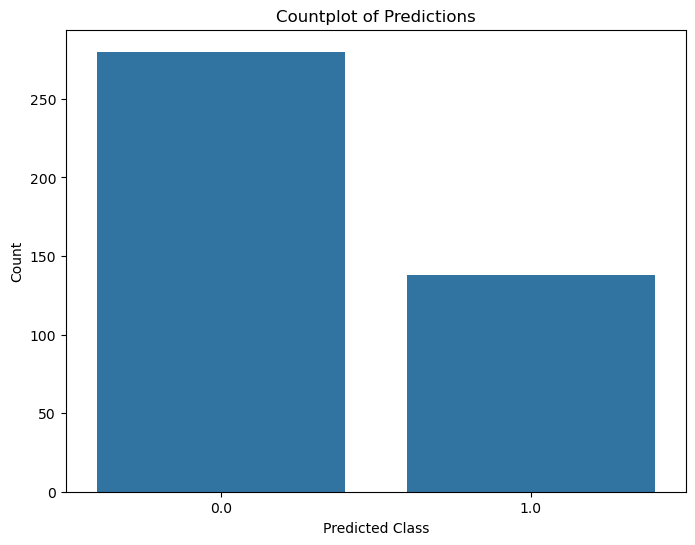

In [65]:
# Countplot of Predictions

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x=prediction_gb_series)
plt.title('Countplot of Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()

In [66]:
# ADABOOSTING MODEL PREDICTIONS

prediction_ada = adamodel.predict(test)
prediction_ada

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [67]:
prediction_ada_series = pd.Series(prediction_ada)
print(prediction_ada_series.value_counts())

0.0    260
1.0    158
Name: count, dtype: int64


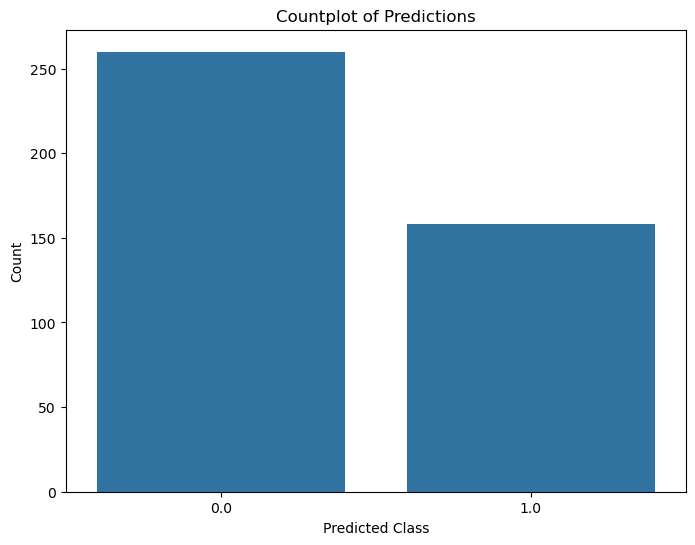

In [68]:
# Countplot of Predictions

plt.figure(figsize=(8, 6))
sns.countplot(x=prediction_ada_series)
plt.title('Countplot of Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()

In [69]:
# XGBOOSTING MODEL PREDICTIONS

prediction_xg = xgmodel.predict(test)
prediction_xg

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [70]:
prediction_xg_series = pd.Series(prediction_xg)
print(prediction_xg_series.value_counts())

0    266
1    152
Name: count, dtype: int64


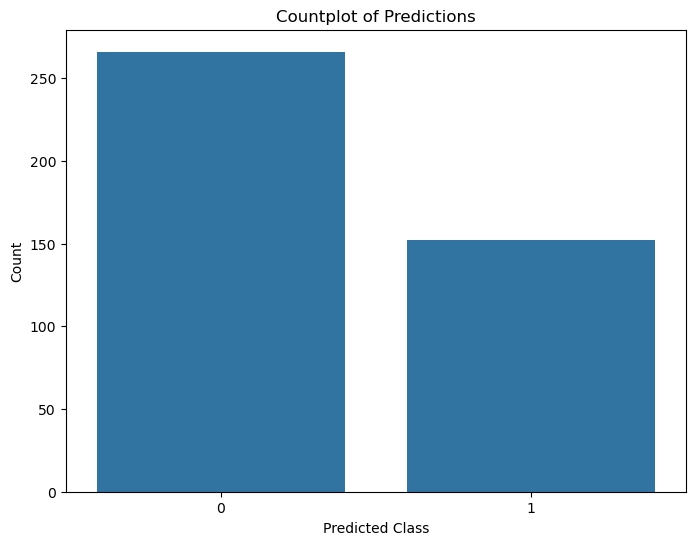

In [71]:
# Countplot of Predictions

plt.figure(figsize=(8, 6))
sns.countplot(x=prediction_xg_series)
plt.title('Countplot of Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()